In [4]:
## NOTE ##

# C17 is int but continous

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df = pd.read_csv("./train/Train_60/X_train_Data_Input.csv")
target = pd.read_csv("./train/Train_60/Y_train_Data_Target.csv")

In [63]:
test_df = pd.read_csv('./test/Test_20/X_Test_Data_Input.csv')
test_target = pd.read_csv("./test/Test_20/Y_Test_Data_Target.csv")

In [66]:
df.head()

,ID,c0,c1,c2,c3,c4,c5,c6,c7,c8,c10,c11,c12,c13,c15,c16,c17,c18,c19,c20,c21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,0,0,0,0,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,0,0,0,0,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,1,1,1,1,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,0.452580,0.701403,-0.007468,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,-0.007469,-0.407939,-0.015607,-0.774979,0,0,0,0,0.00339,0.0,0,0.0,0,0,0


In [67]:
target.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


In [64]:
test_df.head()

,ID,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,07cf2025382f6325b316e128b1b90999,1.0,1986,53.0,0.678139,0.701403,-0.007469,-0.407939,-0.015607,0.554860,-0.088554,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,2.0,1579,12.0,0.678139,0.701403,-0.007468,-0.407939,-0.015607,0.142149,NaN,0,1,1,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,ee35e164b3ddc25a9f40243b81ad290d,0.0,898,3817.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,0,0.0,0,0,0
3,28229ccd7bad7dd83324a4175a7e0531,0.0,79,3449.0,-0.675216,-0.577162,-0.007469,0.004020,-0.015607,0.635264,NaN,0,1,0,1,0.001351,0.00339,0.0,0,0.0,0,0,0
4,2f94873da2c332d28f111742818e0fbb,1.0,646,6510.0,-2.028572,-1.855728,NaN,-0.407939,-0.015434,-0.774979,NaN,1,1,1,1,NaN,0.00339,0.0,0,0.0,0,0,0


In [69]:
test_target.head()

,ID,target
0,07cf2025382f6325b316e128b1b90999,0
1,eb972eb3a1f8d0d1a13f45e7c07d37d4,0
2,ee35e164b3ddc25a9f40243b81ad290d,0
3,28229ccd7bad7dd83324a4175a7e0531,0
4,2f94873da2c332d28f111742818e0fbb,0


In [10]:
# Dataset dimensions
print(f"Total number of data points to train : {df.shape[0]}")
print(f"Total columns : {df.shape[1]} ")

Total number of data points to train : 785133
Total columns : 23 


In [12]:
new_col_names = [f"c{x}" for x in range(df.shape[1]-1)]
df.columns= [df.columns[0]] + new_col_names
print("Columnn names chanaged")
print(df.columns)

Columnn names chanaged
Index(['ID', 'c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20',
       'c21'],
      dtype='object')


In [13]:
df.head()

,ID,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21
0,ad1a67e4cbddc767a3456b0d94299b9e,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,NaN,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,NaN,0,0,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,22ba388e7dd14c13342c49e75fc29dda,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,NaN,1,1,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,59f9b981472d97342587fb3e6392aeb1,0.0,211,59.0,NaN,NaN,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,0,1.0,0,0,0
4,f6317cf7ecf126859804eddff279aead,0.0,718,950.0,-2.028572,-1.855728,NaN,-0.407939,-0.015607,-0.774979,NaN,0,0,0,0,NaN,0.00339,0.0,0,0.0,0,0,0


In [14]:
# ID = df['ID']
# df.drop(columns='ID', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      785133 non-null  object 
 1   c0      785124 non-null  float64
 2   c1      785133 non-null  int64  
 3   c2      785133 non-null  float64
 4   c3      658830 non-null  float64
 5   c4      657423 non-null  float64
 6   c5      617953 non-null  float64
 7   c6      781283 non-null  float64
 8   c7      785133 non-null  float64
 9   c8      781283 non-null  float64
 10  c9      52996 non-null   float64
 11  c10     785133 non-null  int64  
 12  c11     785133 non-null  int64  
 13  c12     785133 non-null  int64  
 14  c13     785133 non-null  int64  
 15  c14     419430 non-null  float64
 16  c15     768677 non-null  float64
 17  c16     785133 non-null  float64
 18  c17     785133 non-null  int64  
 19  c18     785133 non-null  float64
 20  c19     785133 non-null  int64  
 21  c20     78

In [16]:
"""Check unique ID"""
print("Number of unique ID's : ", df.ID.nunique())

Number of unique ID's :  785133


In [17]:
df.shape

(785133, 23)

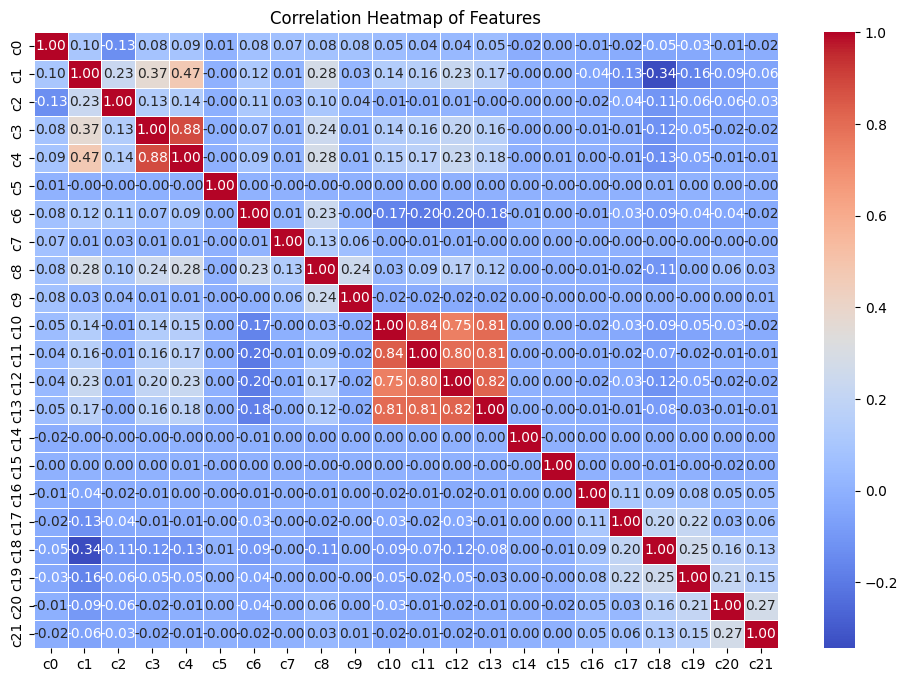

In [18]:
df2 = df.drop(columns='ID')
corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size to fit your data
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [19]:
"""Check Null Values in each columns"""
df.isna().sum()

ID          0
c0          9
c1          0
c2          0
c3     126303
c4     127710
c5     167180
c6       3850
c7          0
c8       3850
c9     732137
c10         0
c11         0
c12         0
c13         0
c14    365703
c15     16456
c16         0
c17         0
c18         0
c19         0
c20         0
c21         0
dtype: int64

In [20]:
(df.isna().sum())/len(df)*100

ID      0.000000
c0      0.001146
c1      0.000000
c2      0.000000
c3     16.086829
c4     16.266034
c5     21.293208
c6      0.490363
c7      0.000000
c8      0.490363
c9     93.250061
c10     0.000000
c11     0.000000
c12     0.000000
c13     0.000000
c14    46.578478
c15     2.095951
c16     0.000000
c17     0.000000
c18     0.000000
c19     0.000000
c20     0.000000
c21     0.000000
dtype: float64

In [21]:
bin_columns = ["c10", "c11", "c12", "c13", "c19","c20","c21"]
cat_columns = ["c0", "c16", "c17", "c18"]
float_columns = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c14", "c15"]

### Missing Values
na_cols = `[c0, c3, c4, c5, c6, c8, c9, c14, c15]`

`c9 and c14` has 93% and 46.5% missing values. These columns can be dropped.

In [22]:
bin_columns_missing = []
cat_columns_missing = ["c0"]
float_columns_missing = ["c3", "c4", "c5", "c6", "c7", "c8", "c9", "c14", "c15"]

### Categorical columns missing value treatment

c0:  missing values are 0.001% of the data.

In [23]:
mode = df['c0'].mode()[0]
df['c0'] = df['c0'].fillna(mode) # Filling with mode

### Numerical Columns Missing Value Treatment

In [24]:
def fillna_proportional(df, column):
    vcount = df[column].value_counts()
    proportion = vcount / vcount.sum()
    missing_count = df[column].isna().sum()
    to_fill_count = (proportion * missing_count).round().astype(int)

    # Adjust the counts based on any discrepancies
    while to_fill_count.sum() != missing_count:
        if to_fill_count.sum() < missing_count:
            to_fill_count[to_fill_count.idxmax()] += 1
        else:
            to_fill_count[to_fill_count.idxmin()] -= 1

    na_indices = df[df[column].isna()].index
    fill_values = np.concatenate([np.repeat(val, count)
                                 for val, count in to_fill_count.items()])
    np.random.shuffle(fill_values)

    df.loc[na_indices, column] = fill_values
    return df

In [27]:
float_columns_missing = ["c3", "c4", "c5",
                         "c6", "c7", "c8", "c9", "c14", "c15"]
fail = []
for col in float_columns_missing:

    # # Method I: Fill with mean
    # df[col] = df[col].fillna(df['c0'].mean())

    # Mehod II: Fill Proprtionally
    try:
        df = fillna_proportional(df, col)
    except:
        fail.append(col)

In [28]:
fail

['c9', 'c14']

c9 and c14 have maximum missing values 93% and 47%.

In [29]:
df.isna().sum()

ID          0
c0          0
c1          0
c2          0
c3          0
c4          0
c5          0
c6          0
c7          0
c8          0
c9     732137
c10         0
c11         0
c12         0
c13         0
c14    365703
c15         0
c16         0
c17         0
c18         0
c19         0
c20         0
c21         0
dtype: int64

In [30]:
# Drop the columns = ['c9', 'c14']
df.drop(columns=['c9', 'c14'], inplace=True)

In [31]:
df.isna().sum()

ID     0
c0     0
c1     0
c2     0
c3     0
c4     0
c5     0
c6     0
c7     0
c8     0
c10    0
c11    0
c12    0
c13    0
c15    0
c16    0
c17    0
c18    0
c19    0
c20    0
c21    0
dtype: int64

`ALL the missing values are treated`

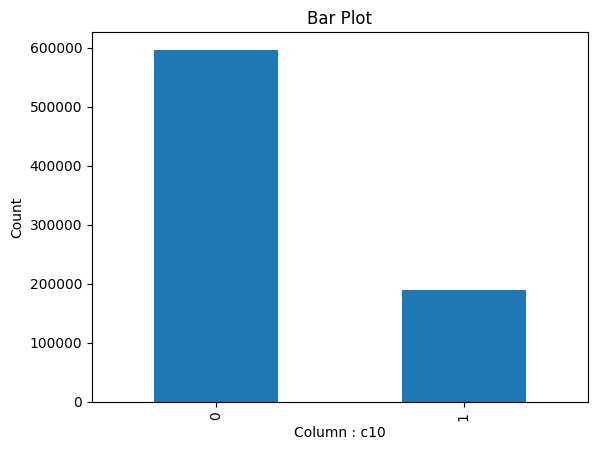

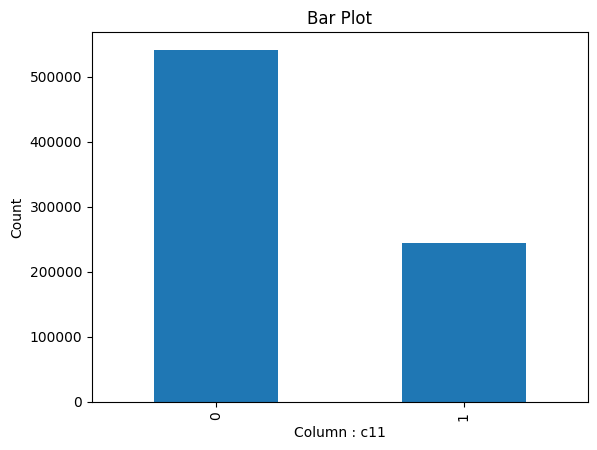

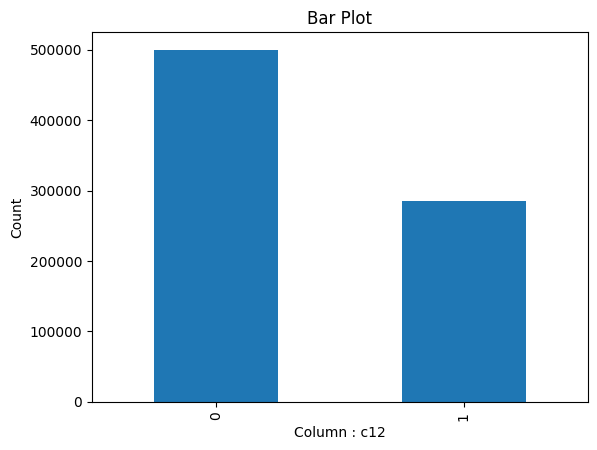

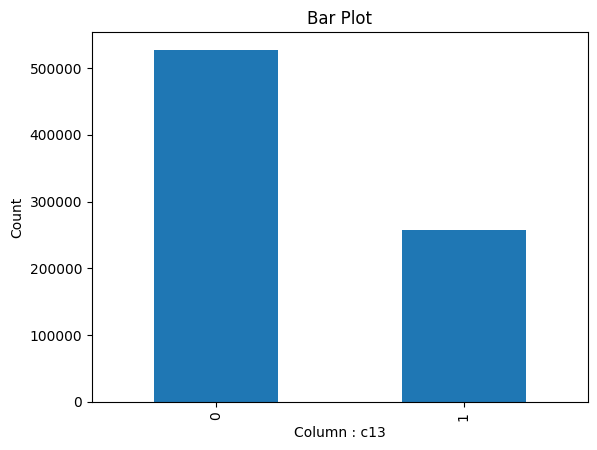

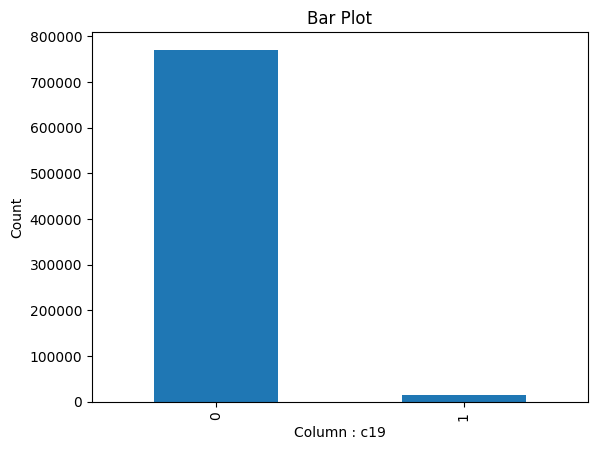

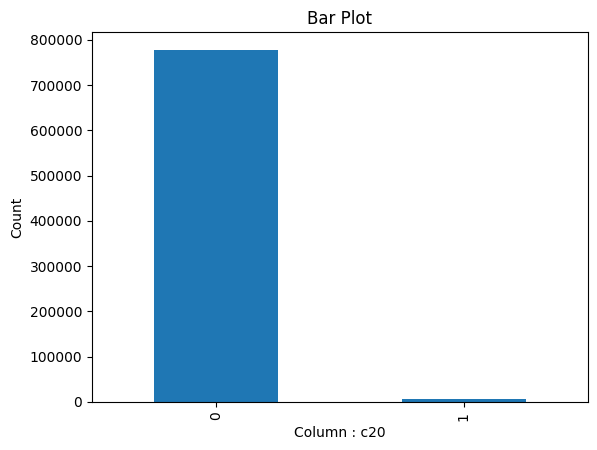

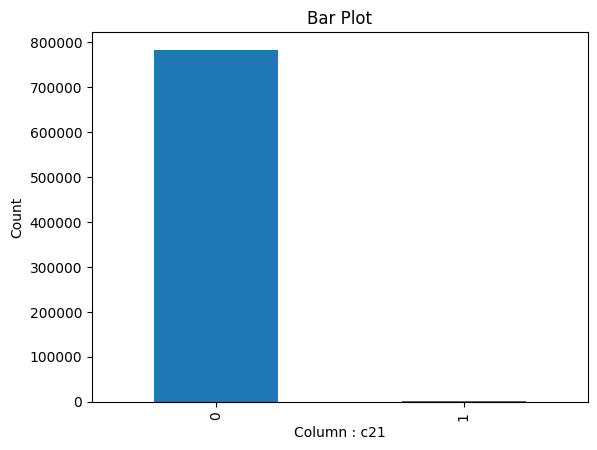

In [32]:
for col_name in bin_columns:
            
    df[col_name].value_counts().plot(kind="bar")
    # Adding labels and title
    plt.title('Bar Plot')
    plt.xlabel(f'Column : {col_name}')
    plt.ylabel('Count')
    plt.show()

All binary columns are OK

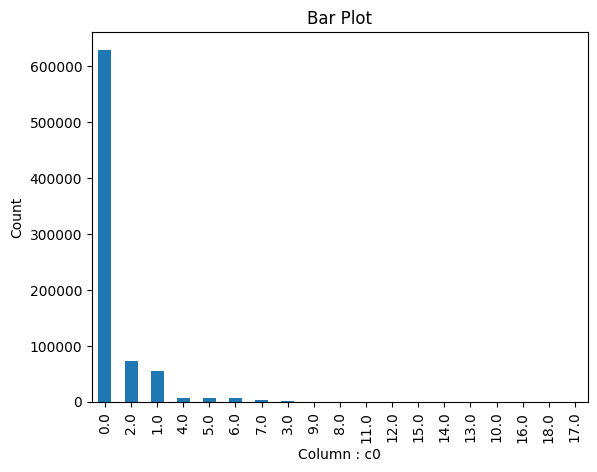

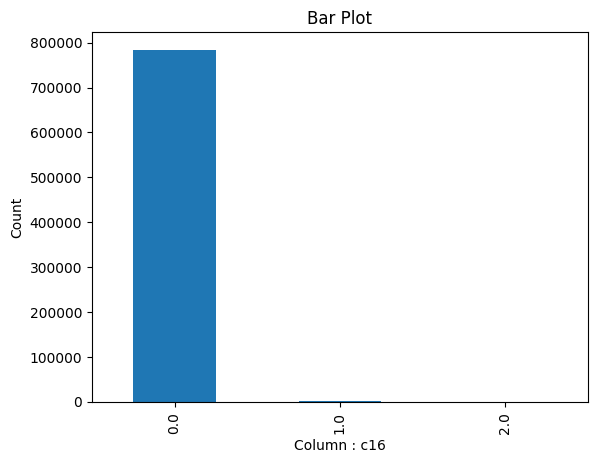

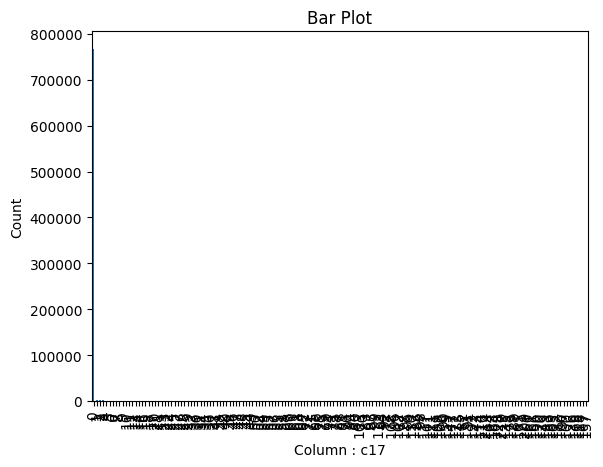

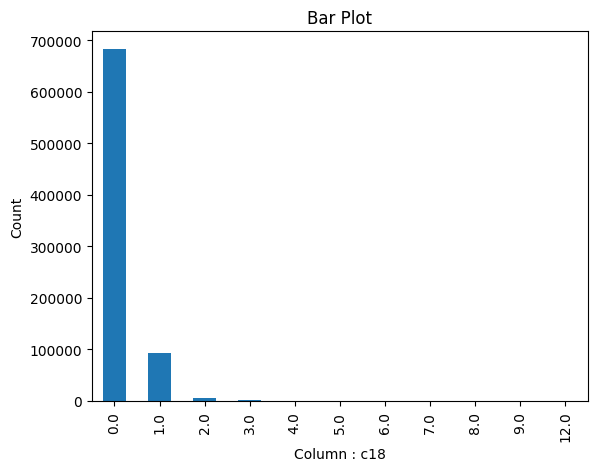

In [33]:
# skip c17
for col_name in cat_columns:
    # if col_name == "c17" : continue
    df[col_name].value_counts().plot(kind="bar")
    # Adding labels and title
    plt.title('Bar Plot')
    plt.xlabel(f'Column : {col_name}')
    plt.ylabel('Count')
    plt.show()

In [34]:
df['c17'].value_counts() # Can be coverted to categorical

c17
0      766697
1        3297
2        1947
3        1472
4        1219
5        1025
6         876
7         743
8         682
9         593
10        496
11        450
12        433
13        385
14        331
16        306
15        298
18        257
17        251
20        220
21        196
19        177
23        164
22        148
24        147
25        140
27        135
26        130
28        116
29         95
32         92
33         88
30         87
31         85
34         77
35         66
36         61
37         59
41         52
38         52
42         51
40         51
39         47
46         41
47         35
43         34
48         33
45         31
44         31
49         30
50         30
52         28
54         24
59         21
55         21
57         21
56         20
53         20
51         19
58         18
63         17
60         16
61         16
68         15
64         14
62         12
72         12
71         12
65         11
66         10
75         10
79

# Target Variable

In [35]:
target.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


target
0    0.905706
1    0.094294
Name: proportion, dtype: float64


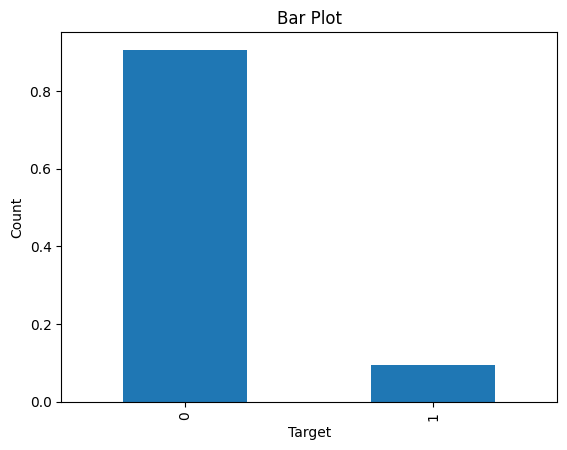

In [36]:
vl_count = target["target"].value_counts(normalize=True)
print(vl_count)
vl_count.plot(kind="bar")
# Adding labels and title
plt.title('Bar Plot')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [37]:
float_columns

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c14', 'c15']

<Axes: >

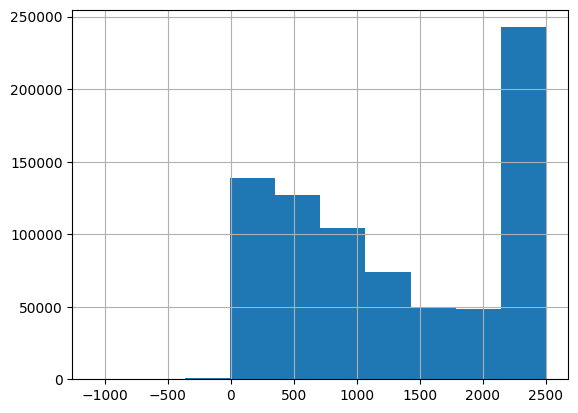

In [38]:
df.c1.hist()

## Model Creation

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [42]:
y = target['target']
X = df.drop(columns='ID')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [45]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [46]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Model Evaluation
y_pred_train = logit.predict(X_train)
y_pred_test = logit.predict(X_test)

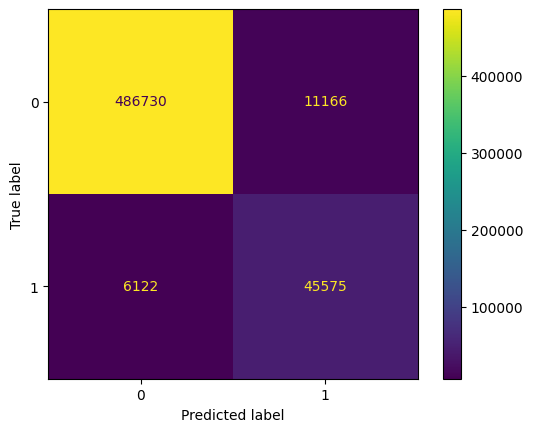

In [52]:
# Confusion Matrix on training data
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
cm_train_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
cm_train_display.plot()


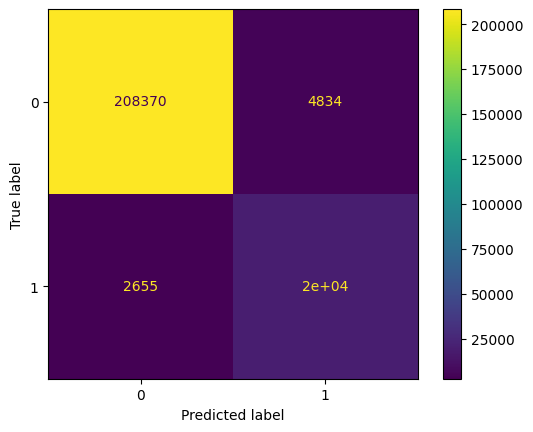

In [53]:
# Confusion Matrix on test data
cm_test = metrics.confusion_matrix(y_test, y_pred_test)
cm_test_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm_test, display_labels=[0, 1])
cm_test_display.plot()

In [57]:
# Classification Report on training data
report_train = metrics.classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    497896
           1       0.80      0.88      0.84     51697

    accuracy                           0.97    549593
   macro avg       0.90      0.93      0.91    549593
weighted avg       0.97      0.97      0.97    549593



In [59]:
# Classification Report on test data
report_test = metrics.classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98    213204
           1       0.80      0.88      0.84     22336

    accuracy                           0.97    235540
   macro avg       0.90      0.93      0.91    235540
weighted avg       0.97      0.97      0.97    235540



In [49]:
# Accuracy
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)

print(f"Accuracy on Training Data: {train_accuracy} \nAccuracy on Test Data: {test_accuracy}")

Accuracy on Training Data: 0.9685439952837828 
Accuracy on Test Data: 0.9682049758002887
